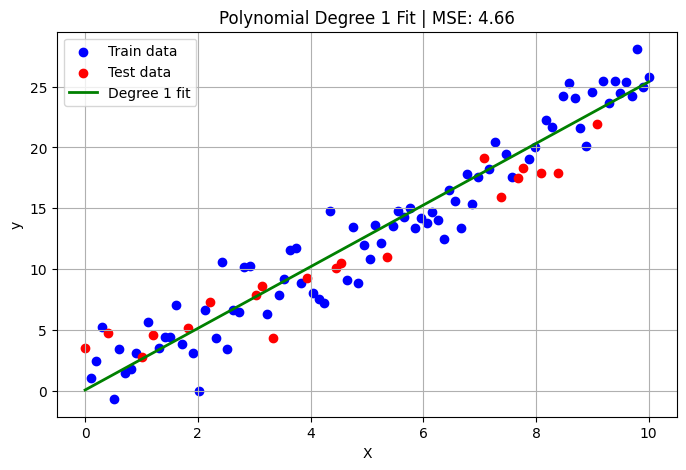

Degree 1 model MSE on test set: 4.66


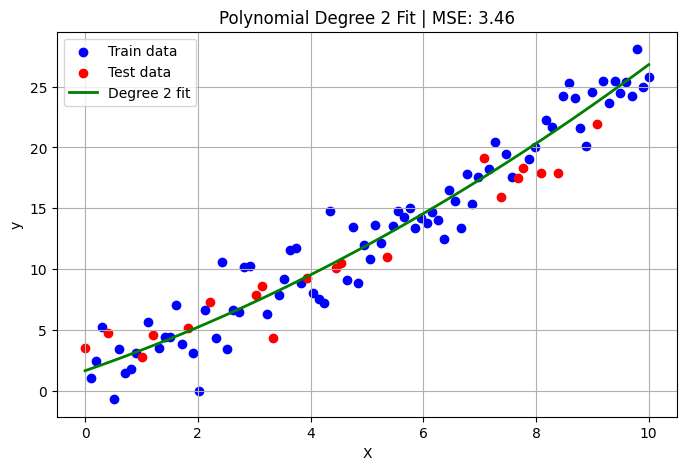

Degree 2 model MSE on test set: 3.46


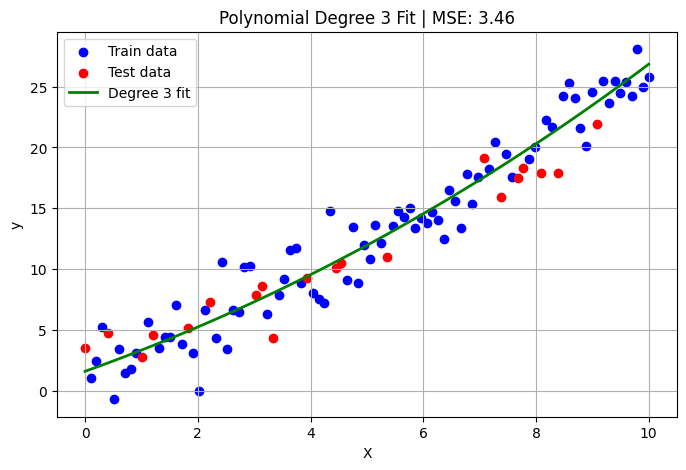

Degree 3 model MSE on test set: 3.46


In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd

#Question 6
np.random.seed(0)
X = np.linspace(0, 10, 100).reshape(-1, 1)
true_coeff = 2.5
y = true_coeff * X.flatten() + np.random.normal(0, 2, X.shape[0])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


def fit_and_plot(degree):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)


    X_plot = np.linspace(0, 10, 100).reshape(-1, 1)
    X_plot_poly = poly.transform(X_plot)
    y_plot = model.predict(X_plot_poly)

    plt.figure(figsize=(8, 5))
    plt.scatter(X_train, y_train, color='blue', label='Train data')
    plt.scatter(X_test, y_test, color='red', label='Test data')
    plt.plot(X_plot, y_plot, color='green', linewidth=2, label=f'Degree {degree} fit')
    plt.title(f'Polynomial Degree {degree} Fit | MSE: {mse:.2f}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f'Degree {degree} model MSE on test set: {mse:.2f}')

for d in [1, 2, 3]:
    fit_and_plot(d)


